In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scaling import analysis

In [5]:
models = {'lognormal_delta_fixed': analysis.LogNormalFixedDAnalysis,
          'lognormal_delta_fixed_beta_fixed': analysis.LogNormalFixedDFixedBetaAnalysis,
          'lognormal': analysis.LogNormalAnalysis,
          'lognormal_beta_fixed': analysis.LogNormalFixedBetaAnalysis,
          'gaussian_delta_fixed': analysis.FixedDAnalysis,
          'gaussian_delta_fixed_beta_fixed': analysis.FixedDFixedBetaAnalysis,
          'gaussian': analysis.ConstrainedDAnalysis,
          'gaussian_beta_fixed': analysis.ConstrainedDFixedBetaAnalysis,
          'person': analysis.PopulationAnalysis,
          'person_beta_fixed': analysis.PopulationFixedGammaAnalysis}

In [6]:
final_data = pd.read_csv('final_data.csv')

a = final_data['Attractiveness'].tolist()
population = final_data['Population'].tolist()
inbound = final_data['c_in'].tolist()
# Commute Impact Factor
cif = (final_data['Attractiveness'] * final_data['Population']).tolist()

x_values = [a,population,inbound,cif]

cda = final_data['Criminal Damage and Arson'].tolist()
cod = final_data['Crimes Of Dishonesty'].tolist()
so = final_data['Sexual Offences'].tolist()
vio = final_data['Violence'].tolist()
oc = final_data['Other'].tolist()
total = final_data['Total'].tolist()

In [7]:
data_xy = (cif, total)

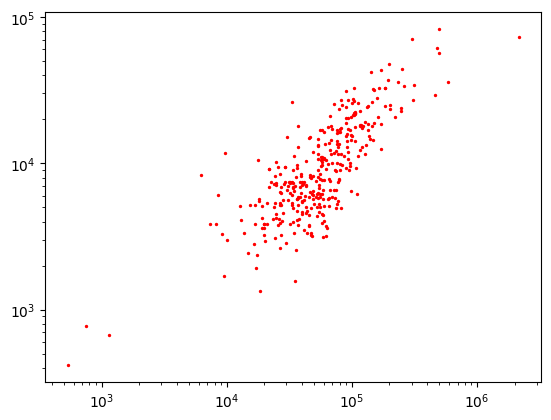

In [8]:
plt.scatter(*data_xy, color='red', s=2.)
plt.xscale('log')
plt.yscale('log')

Let's fit with different models (check Leitão et al. paper).

In [6]:
for m in models:
    model = models[m]
    r = model(data_xy, required_successes=50)
    # alpha, beta, gamma, delta = r.params
    beta, beta_ci = r.beta
    bic = r.bic
    params = list(r.params)
    for _ in range(4 - len(params)):
        params.append("")
    line = "%s," % m
    line += "%f," % beta
    line += "%f," % beta_ci
    line += "%f," % bic
    line += "%f," % r.p_value
    line += ",".join(map(str, params))
    print(line)
#     print("mean: " + ",".join(map(str, r.mean)))
#     print("std:  " + ",".join(map(str, r.std)))
    
#     errors = r.model_error_bars()
#     print("%s,%s,%s,errors_0," + ",".join(map(str, errors[0])))
#     print("%s,%s,%s,errors_1," + ",".join(map(str, errors[1])))

lognormal_delta_fixed,1.085349,0.010476,35412.542935,0.000000,38.481938028926635,1.0853492146960515,1.1649155309106798,2.0
lognormal_delta_fixed_beta_fixed,1.000000,0.000000,35645.246509,0.000000,163.66930520041123,1.0,1.802979652483086,2.0
lognormal,1.073293,0.085142,35406.963826,0.000000,46.388749826036936,1.073293475279714,2.5841369161780285,1.960323447066506
lognormal_beta_fixed,1.000000,0.000000,35512.493519,0.000000,191.07403303591633,1.0,26.66773868834106,1.8697511946804652
gaussian_delta_fixed,1.486472,0.943790,38754.909823,0.000000,0.001712130427879161,1.4864722822896559,749136.3707817534,0.5
gaussian_delta_fixed_beta_fixed,1.000000,0.000000,42078.808089,0.000000,254.87638342592024,1.0,691430.3748764457,0.5
gaussian,1.077071,0.013258,35236.174183,0.000000,38.803022090536345,1.0770707857820918,0.7898556899885486,0.9866914010048584
gaussian_beta_fixed,1.000000,0.000000,35775.594304,0.000000,141.23506602322468,1.0,0.7570391309710969,1.0
person,1.119620,0.099617,23036623088799632.

Each row is a model and its respective estimated parameters. We need to compare them via BIC (see Leitão et al. paper).

# Example plot

In [7]:
model = models['lognormal']
r = model(data_xy, required_successes=50)
beta, beta_ci = r.beta
bic = r.bic
alpha, beta, gamma, delta = r.params

In [8]:
x = 10**np.linspace(np.log10(data_xy[0].min()*0.8), np.log10(data_xy[0].max()*1.2), 300)
mean = alpha*np.power(x, beta)

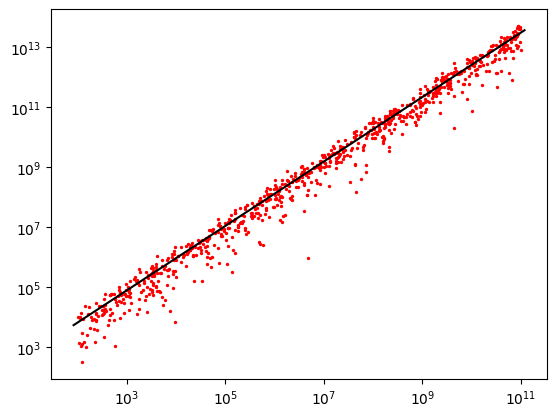

In [9]:
plt.scatter(*data_xy, color='red', s=2.)
plt.plot(x, mean, color='k')
plt.xscale('log')
plt.yscale('log')

In [10]:
beta, beta_ci 

(1.0732988367144263, 0.013494258431205202)